# 22.7 Compare Decision Trees and Random Forests Challenge
Now that you've learned about random forests and decision trees let's do an exercise in accuracy. You know that random forests are basically a collection of decision trees. But how do the accuracies of the two models compare?

So here's what you should do. Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect but just go with it.

## Importing the Data
The data is from the Airbnb public dataset, and it describes the listing activity and metrics of 48k properties in NYC for 2019.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats.mstats import winsorize
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Data Cleaning

In [3]:
# See the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [4]:
# Print list of all missing values
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Filling Missing Values
The data has quite a bit of missing values in the 'last_review' and 'reviews_per_month' columns. Looking at those columns, the rooms have not been reviewed yet so the columns have been left blank. The columns will be filled with 0 if the rooms have not been reviewed. The host names and names are not relevant for this analysis so they will be left blank.

In [5]:
# Fill missing values with 0 if the number of reviews is 0
df.loc[df['number_of_reviews']==0, ['reviews_per_month', 
                                    'last_review']] = 0

In [6]:
# Print list of all missing values
df.isna().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

## Dealing with Outliers
According to the boxplots below, each variable below is positively skewed. All except availability has major outliers. The outliers below will be dealt with either a log transformation, winsorize, or both. See below for the results:

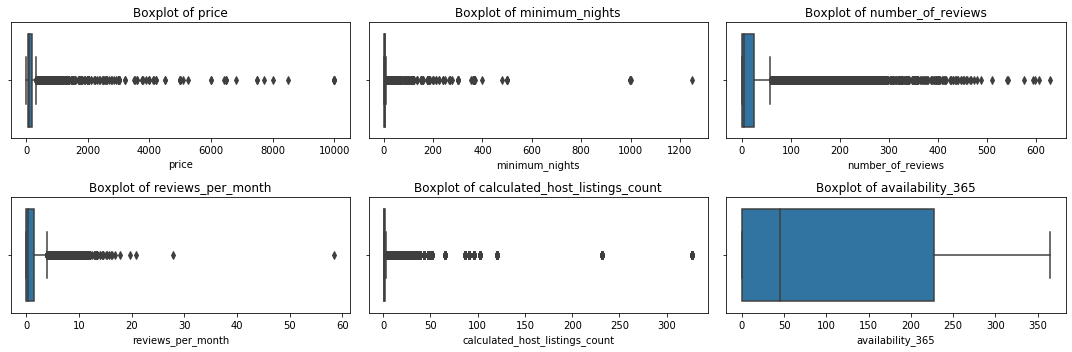

In [7]:
df2 = df.select_dtypes(include=['float64', 'int64'])
df2.drop(['id', 'host_id', 'latitude', 'longitude'], axis=1, inplace=True)

plt.figure(figsize=(15, 5))
for i, col in enumerate(df2):
    i += 1
    plt.subplot(2, 3, i)
    sns.boxplot(df2[col])
    plt.title('Boxplot of {}'.format(col))

plt.tight_layout()
plt.show()

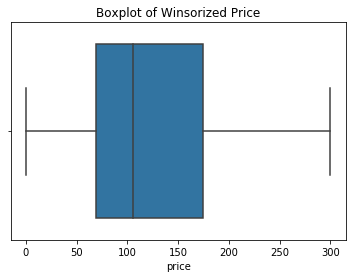

In [8]:
# Remove outliers by winsorizing the variable
df['price'] = winsorize(df['price'], (0, .07))

# Plot the winsorized price
sns.boxplot(df['price'])
plt.title('Boxplot of Winsorized Price')
plt.show()

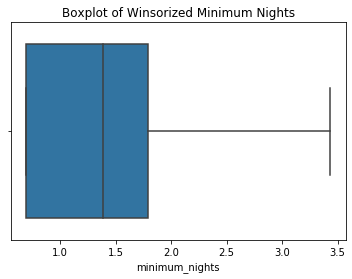

In [9]:
# Remove outliers by winsorizing the variable
df['minimum_nights'] = np.log1p(df['minimum_nights'])
df['minimum_nights'] = winsorize(df['minimum_nights'], (0, .02))

# Plot the winsorized price
sns.boxplot(df['minimum_nights'])
plt.title('Boxplot of Winsorized Minimum Nights')
plt.show()

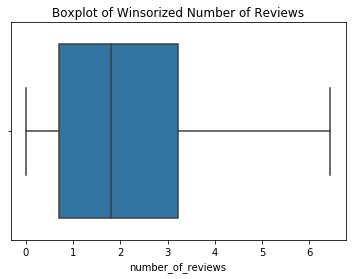

In [10]:
# Remove outliers by winsorizing the variable
df['number_of_reviews'] = np.log1p(df['number_of_reviews'])

# Plot the winsorized price
sns.boxplot(df['number_of_reviews'])
plt.title('Boxplot of Winsorized Number of Reviews')
plt.show()

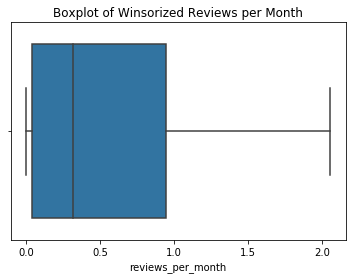

In [11]:
# Remove outliers by winsorizing the variable
df['reviews_per_month'] = np.log1p(df['reviews_per_month'])
df['reviews_per_month'] = winsorize(df['reviews_per_month'], (0, .01))

# Plot the winsorized price
sns.boxplot(df['reviews_per_month'])
plt.title('Boxplot of Winsorized Reviews per Month')
plt.show()

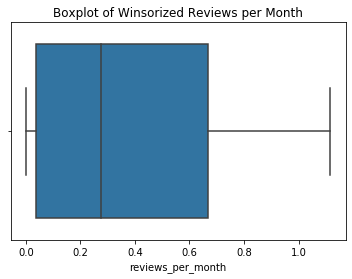

In [12]:
# Remove outliers by winsorizing the variable
df['reviews_per_month'] = np.log1p(df['reviews_per_month'])
df['reviews_per_month'] = winsorize(df['reviews_per_month'], (0, .01))

# Plot the winsorized price
sns.boxplot(df['reviews_per_month'])
plt.title('Boxplot of Winsorized Reviews per Month')
plt.show()

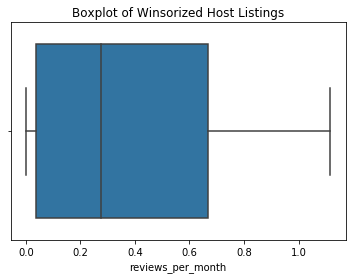

In [13]:
# Remove outliers by winsorizing the variable
df['calculated_host_listings_count'] = winsorize(df['calculated_host_listings_count'], (0, .01))

# Plot the winsorized price
sns.boxplot(df['reviews_per_month'])
plt.title('Boxplot of Winsorized Host Listings')
plt.show()

## Data Exploration
In this section several questions will be explored:
    1. What neighborhoods have the most places to rent?
    2. Which are the most expensive? Which is the cheapest?
    3. What affects availability?

### Count per Neighborhood
The plots below show that Manhattan and Brooklyn have the largest volume of properties to rent. This is not surprising since these are the more desireable locations in NYC for people wanting to visit. The prices for the most part were surprisingly lower overall with most of the neighborhoods having an average price of 125 or less. The one exception to this is Manhatten where it is 160 a night to rent. The Violin plot below shows that the majority of the properties are in this price point but there is a small amount well above it.

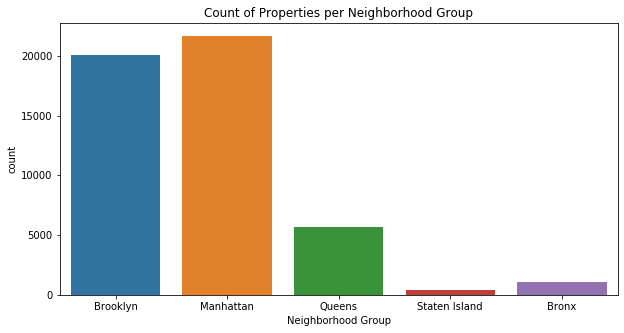

In [14]:
# Create a countplot per neighborhood
plt.figure(figsize=(10, 5))
sns.countplot(x=df['neighbourhood_group'])

plt.title('Count of Properties per Neighborhood Group')
plt.xlabel('Neighborhood Group')

plt.show()

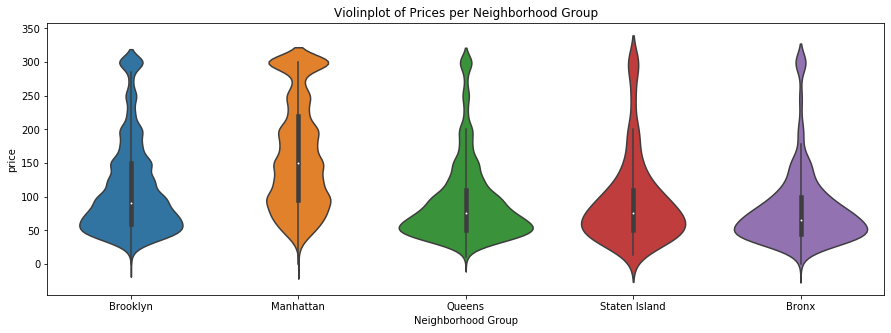

In [15]:
# Create a violin plot per neighborhood group
plt.figure(figsize=(15, 5))
sns.violinplot(data=df, x='neighbourhood_group', y='price')

plt.title('Violinplot of Prices per Neighborhood Group')
plt.xlabel('Neighborhood Group')

plt.show()

In [16]:
# Print a list of prices per neighborhood group
df.groupby('neighbourhood_group')['price'].mean().sort_values()

neighbourhood_group
Bronx             81.611366
Queens            92.559301
Staten Island     93.756032
Brooklyn         112.276064
Manhattan        161.020821
Name: price, dtype: float64

### What Affects Availability?
Now that we have an understanding of the prices of the various neighborhoods what are the variables that affect availability. This would be great to understand as a potential AirBnB host. Surprisingly, in NYC nothing is really correlated with the availability of the prices. It looks like there may be a higher volume of properties to rent than there is demand. 

In [17]:
df_corr = df.corr()
print(df_corr['availability_365'])

id                                0.085468
host_id                           0.203492
latitude                         -0.010983
longitude                         0.082731
price                             0.108775
minimum_nights                    0.177566
number_of_reviews                 0.171066
reviews_per_month                 0.204501
calculated_host_listings_count    0.240020
availability_365                  1.000000
Name: availability_365, dtype: float64


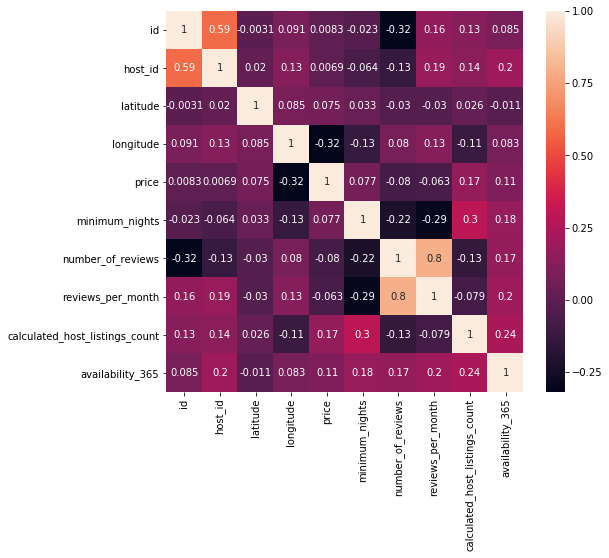

In [18]:
plt.figure(figsize=(8,7))
sns.heatmap(df_corr, annot=True)
#plt.tight_layout()
plt.show()

## Model 1: Decision Tree
For the challenege, the best decision tree needs to be made with the data and compared to the simpliest random forest. The target variable of the decision tree is how often a property is available to rent. The lower this figure the better the income for the owners. The features were all the numeric variables explored above as well as the dummies for the neighborhoods. The main concern is the lack of correlation within the variables to the target as highlighted above. A decision tree regressor was built due to the target variable being continuous rather than categorical. Due to this fact the scoring of the accuracy of the cross validation was based on the mean standard error. 

In [19]:
import time

# Time the runtime of the decision tree
start_time = time.time()

from sklearn import tree
from sklearn.model_selection import cross_val_score

# Initialize and Train Tree
decision_tree = tree.DecisionTreeRegressor(
    max_features=3, max_depth=5,)

# Y is the target variable
Y = df['availability_365']

# X is the feature variables
X = df.drop(['availability_365', 'id', 'name', 
             'host_id', 'host_name', 'last_review'], axis=1)

# Create Dummies for the neighborhoods
X = pd.get_dummies(X)

# Fit to decision tree
decision_tree.fit(X, Y)

# Evaluate the accuracy of the tree
print(cross_val_score(decision_tree, X, Y,
                      scoring='neg_mean_squared_error', cv=10))
print("--- %s seconds ---" % (time.time() - start_time))

[-20162.07206316 -17661.82518348 -16664.59425847 -16615.56601043
 -15259.13152248 -15673.14669093 -15817.23806566 -17617.68464767
 -17083.97931488 -20471.44247801]
--- 1.9246516227722168 seconds ---


## Model 2: Random Forest
As stated above the target and features were fitted to the most basic random forest model. The comparison of the two models will be done below in the 'Summary and Conclusion' section. 

In [20]:
from sklearn import ensemble

# Time the runtime of the decision tree
start_time = time.time()

# Evaluate the Random Forest Model
rfc = ensemble.RandomForestRegressor()
print(cross_val_score(rfc, X, Y, 
                      scoring='neg_mean_squared_error', cv=10))
print("--- %s seconds ---" % (time.time() - start_time))

[-16367.42584049 -11479.50704499  -9658.52820041 -10910.02097955
 -10492.6460593  -10199.32846594 -11666.87690325 -13459.9915811
 -13349.77679485 -17752.14677439]
--- 77.2155933380127 seconds ---


## Summary and Conclusion
The two models produced very different results. In terms of the accuracy variable, the MSE, the random forest performed better than the decision tree as each cross fold was lower. In terms of the run time the decision tree model ran in 1.1 seconds while the random forest took 53.1 seconds to run. The drastic difference was very surprising. Overall, the features incorporated into the two trees were fairly small. One can assume as the complexity and size of the data increases so would the run time in the random forest increase. 

Another important feature to note between the two models is the visibility of the data. In the random forest all the model calculations, and selected features for each individual trees are hidden. This is called a black box. Whereas with decision trees, one can output the tree itself and see what were each of the decisions made to come up the conclusions. Overall, the random forest is just such a powerful model to ignore. The vastly improved accuracy and simplicity greatly outweight the con of longer run times. 

## References
Data - https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/downloads/new-york-city-airbnb-open-data.zip/3#AB_NYC_2019.csv